# Creating Word Vectors with word2vec
## by Wilder Rodrigues

https://medium.com/cityai/deep-learning-for-natural-language-processing-part-i-8369895ffb98

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/learning-stack/Colab-ML-Playbook/blob/master/NLP/Deep%20Learning%20for%20NLP%20-%20Part%201/word2vec.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/learning-stack/Colab-ML-Playbook/blob/master/NLP/Deep%20Learning%20for%20NLP%20-%20Part%201/word2vec.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

Let's start with NLTK

#### Load Dependencies

In [0]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.models.word2vec import Word2Vec
from sklearn.manifold import TSNE
import pandas as pd
from bokeh.io import output_notebook
from bokeh.plotting import show, figure
%matplotlib inline

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Load Data

In [3]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [0]:
from nltk.corpus import gutenberg

In [5]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

#### Tokenize Text

In [0]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sent_tokens = sent_tokenize(gutenberg.raw(fileids=['austen-sense.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt']))

In [7]:
gberg_sent_tokens[0:5]

['[Sense and Sensibility by Jane Austen 1811]\n\nCHAPTER 1\n\n\nThe family of Dashwood had long been settled in Sussex.',
 'Their estate was large, and their residence was at Norland Park,\nin the centre of their property, where, for many generations,\nthey had lived in so respectable a manner as to engage\nthe general good opinion of their surrounding acquaintance.',
 'The late owner of this estate was a single man, who lived\nto a very advanced age, and who for many years of his life,\nhad a constant companion and housekeeper in his sister.',
 'But her death, which happened ten years before his own,\nproduced a great alteration in his home; for to supply\nher loss, he invited and received into his house the family\nof his nephew Mr. Henry Dashwood, the legal inheritor\nof the Norland estate, and the person to whom he intended\nto bequeath it.',
 "In the society of his nephew and niece,\nand their children, the old Gentleman's days were\ncomfortably spent."]

In [8]:
gberg_sent_tokens[1]

'Their estate was large, and their residence was at Norland Park,\nin the centre of their property, where, for many generations,\nthey had lived in so respectable a manner as to engage\nthe general good opinion of their surrounding acquaintance.'

In [9]:
word_tokenize(gberg_sent_tokens[1])

['Their',
 'estate',
 'was',
 'large',
 ',',
 'and',
 'their',
 'residence',
 'was',
 'at',
 'Norland',
 'Park',
 ',',
 'in',
 'the',
 'centre',
 'of',
 'their',
 'property',
 ',',
 'where',
 ',',
 'for',
 'many',
 'generations',
 ',',
 'they',
 'had',
 'lived',
 'in',
 'so',
 'respectable',
 'a',
 'manner',
 'as',
 'to',
 'engage',
 'the',
 'general',
 'good',
 'opinion',
 'of',
 'their',
 'surrounding',
 'acquaintance',
 '.']

In [10]:
word_tokenize(gberg_sent_tokens[1])[14]

'the'

In [0]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
gberg_sents = gutenberg.sents(fileids=['austen-sense.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt'])

In [12]:
gberg_sents[0:5]

[['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', 'Austen', '1811', ']'],
 ['CHAPTER', '1'],
 ['The',
  'family',
  'of',
  'Dashwood',
  'had',
  'long',
  'been',
  'settled',
  'in',
  'Sussex',
  '.'],
 ['Their',
  'estate',
  'was',
  'large',
  ',',
  'and',
  'their',
  'residence',
  'was',
  'at',
  'Norland',
  'Park',
  ',',
  'in',
  'the',
  'centre',
  'of',
  'their',
  'property',
  ',',
  'where',
  ',',
  'for',
  'many',
  'generations',
  ',',
  'they',
  'had',
  'lived',
  'in',
  'so',
  'respectable',
  'a',
  'manner',
  'as',
  'to',
  'engage',
  'the',
  'general',
  'good',
  'opinion',
  'of',
  'their',
  'surrounding',
  'acquaintance',
  '.'],
 ['The',
  'late',
  'owner',
  'of',
  'this',
  'estate',
  'was',
  'a',
  'single',
  'man',
  ',',
  'who',
  'lived',
  'to',
  'a',
  'very',
  'advanced',
  'age',
  ',',
  'and',
  'who',
  'for',
  'many',
  'years',
  'of',
  'his',
  'life',
  ',',
  'had',
  'a',
  'constant',
  'companion',
  'and'

In [13]:
gberg_sents[4][14]

'a'

In [14]:
gutenberg.words()

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]

If you want to know how many words are in the set we loaded, please execute the line below:

In [15]:
# Due to lack of resources, I'm not working with the full Gutenberg dataset (18 books).
len(gutenberg.words(fileids=['austen-sense.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt']))

1104978

#### Run Word2Vec

In [0]:
# size == dimensions
# window 10: 20 context words, 10 to the left and 10 to the right
model = Word2Vec(sentences=gberg_sents, size=64, sg=1, window=10, min_count=5, seed=42, workers=2)

In [0]:
# We don't have to save the model if we don't want to. It's being done here as demonstration.
model.save('raw_gutenberg_model.w2v')

#### Explore the Model

In [0]:
model = Word2Vec.load('raw_gutenberg_model.w2v')

In [19]:
model['house']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.10131513, -0.05675188,  0.01952054, -0.15445842, -0.138105  ,
        0.09935395, -0.24682845, -0.13413033,  0.20148936,  0.41659695,
       -0.4477915 , -0.39699993, -0.03888248, -0.15544629, -0.366475  ,
       -0.1712916 , -0.5880298 ,  0.3802758 , -0.04494437,  0.17340937,
        0.09923273, -0.24605654,  0.00904231,  0.27070048,  0.32214862,
       -0.0595443 , -0.4526931 ,  0.23305707, -0.4573316 , -0.3141891 ,
        0.01292173,  0.02185524,  0.21936235,  0.1726625 ,  0.13554275,
        0.6503442 , -0.10124332,  0.1500032 , -0.06350603,  0.5996642 ,
       -0.36090168,  0.16507895,  0.05793128,  0.27607602, -0.2618879 ,
        0.26170492, -0.08908819,  0.72215563,  0.08825453,  0.22807482,
       -0.33615875,  0.1744813 ,  0.73821414,  0.22372776,  0.09251411,
        0.12206586, -0.43199712, -0.27780202,  0.32463044,  0.24237062,
       -0.01388139,  0.47537094,  0.2258392 , -0.3018243 ], dtype=float32)

In [20]:
len(model['house'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


64

## Similarities

In [21]:
model.most_similar('house')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cottage', 0.8297926187515259),
 ('court', 0.7892372608184814),
 ('carriage', 0.7814562916755676),
 ('dining', 0.7685059309005737),
 ('room', 0.7588936686515808),
 ('park', 0.7570878267288208),
 ('parlour', 0.7529228925704956),
 ('Allenham', 0.7474149465560913),
 ('garden', 0.7421767711639404),
 ('door', 0.734196126461029)]

In [22]:
model.most_similar('think')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('suppose', 0.8716133236885071),
 ('understand', 0.8545761108398438),
 ('manage', 0.8265016078948975),
 ('impertinent', 0.8212658762931824),
 ('NOW', 0.821075439453125),
 ('remember', 0.8205576539039612),
 ('guess', 0.8203558325767517),
 ('know', 0.8141898512840271),
 ('MUST', 0.8126161694526672),
 ('pretend', 0.8122284412384033)]

In [23]:
model.most_similar('day')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('morning', 0.8452898263931274),
 ('night', 0.7850326299667358),
 ('evening', 0.7603015899658203),
 ('year', 0.718474268913269),
 ('summer', 0.715593695640564),
 ('week', 0.6938982009887695),
 ('eleven', 0.6928486824035645),
 ('spend', 0.6863486766815186),
 ('work', 0.6769124865531921),
 ('morrow', 0.6764428019523621)]

In [24]:
model.most_similar('father')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.8264411687850952),
 ('brother', 0.8260844945907593),
 ('wife', 0.8197144269943237),
 ('master', 0.807135283946991),
 ('uncle', 0.8006727695465088),
 ('son', 0.8003227710723877),
 ('cousin', 0.7965275049209595),
 ('Maurice', 0.7775335311889648),
 ('Fanny', 0.764549195766449),
 ('child', 0.7570911645889282)]

In [25]:
model.doesnt_match('mother father daughter house'.split())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'house'

In [26]:
model.similarity('father', 'mother')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.82644117

## Arithmetics

In [27]:
model.most_similar(positive=['father', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.8312838673591614),
 ('brother', 0.8063112497329712),
 ('husband', 0.7933018207550049),
 ('daughter', 0.7672345638275146),
 ('Susan', 0.7484555244445801),
 ('Mary', 0.7448858022689819),
 ('sisters', 0.7424876093864441),
 ('daughters', 0.7414028644561768),
 ('Fanny', 0.7363728284835815),
 ('Lady', 0.7363330125808716)]

In [28]:
model.most_similar(positive=['son', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('daughter', 0.802619457244873),
 ('eldest', 0.7667378783226013),
 ('husband', 0.7554774284362793),
 ('daughters', 0.7501215934753418),
 ('brother', 0.7450388669967651),
 ('Lady', 0.7243521213531494),
 ('father', 0.7241641879081726),
 ('mother', 0.7144978642463684),
 ('sisters', 0.7136102914810181),
 ('widow', 0.6957226991653442)]

In [29]:
model.most_similar(positive=['husband', 'woman'], negative=['man'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('mother', 0.8124408721923828),
 ('sister', 0.8002678155899048),
 ('daughter', 0.7921462655067444),
 ('brother', 0.7845842838287354),
 ('sisters', 0.7768650054931641),
 ('daughters', 0.7713946104049683),
 ('herself', 0.7494838237762451),
 ('eldest', 0.7470123171806335),
 ('Fanny', 0.7425500154495239),
 ('Mary', 0.7336406707763672)]

In [30]:
model.most_similar(positive=['king', 'woman'], negative=['man'], topn=30)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('eldest', 0.7696983814239502),
 ('daughters', 0.7400450110435486),
 ('son', 0.7265148162841797),
 ('husband', 0.7065160274505615),
 ('provided', 0.7062243223190308),
 ('visit', 0.7061595916748047),
 ('Middleton', 0.7050511240959167),
 ('daughter', 0.7040594816207886),
 ('widow', 0.6983100175857544),
 ('mother', 0.6973187923431396),
 ('invited', 0.697148323059082),
 ('father', 0.695784330368042),
 ('attending', 0.6953961849212646),
 ('elder', 0.6953688263893127),
 ('wife', 0.6942468285560608),
 ('youngest', 0.6863446235656738),
 ('Lady', 0.6857272386550903),
 ('Margaret', 0.6855330467224121),
 ('songs', 0.6828248500823975),
 ('lively', 0.6822395920753479),
 ('Sicily', 0.6803657412528992),
 ('Robert', 0.680312991142273),
 ('Fanny', 0.6795834302902222),
 ('Exeter', 0.6757887601852417),
 ('Gray', 0.6714882254600525),
 ('robbed', 0.6712646484375),
 ('invitation', 0.6679407358169556),
 ('honoured', 0.6669725179672241),
 ('charity', 0.6668208837509155),
 ('wrote', 0.6658169627189636)]

#### Reduce word vector dimensionality with t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets.

Although our vector space representation doesn’t have many dimensions, we got only 64, it is still enough to get humans confused if we we try to plot the 8667 words from our vocabulary in a graph. Now imagine how it would work with 10 million words and thousand dimensions! Our friend that was shortly explained above can help us with that. Let’s get to the code and plotting.

In [31]:
len(model.wv.vocab)

11319

In [32]:
X = model[model.wv.vocab]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
tsne = TSNE(n_components=2, n_iter=250)

In [0]:
X_2d = tsne.fit_transform(X)

In [0]:
coords_df = pd.DataFrame(X_2d, columns=['x', 'y'])
coords_df['token'] = model.wv.vocab.keys()

In [36]:
coords_df.head()

,x,y,token
0,1.019629,-0.435653,[
1,-0.421549,-0.241114,and
2,-0.159276,-0.003193,by
3,1.019609,-0.434047,]
4,1.010063,-0.445396,CHAPTER


In [0]:
coords_df.to_csv('raw_gutenberg_tsne.csv', index=False)

#### Visualise 2D representation of word vectors

In [0]:
coorrds_df = pd.read_csv('raw_gutenberg_tsne.csv')

In [39]:
coords_df.head()

,x,y,token
0,1.019629,-0.435653,[
1,-0.421549,-0.241114,and
2,-0.159276,-0.003193,by
3,1.019609,-0.434047,]
4,1.010063,-0.445396,CHAPTER


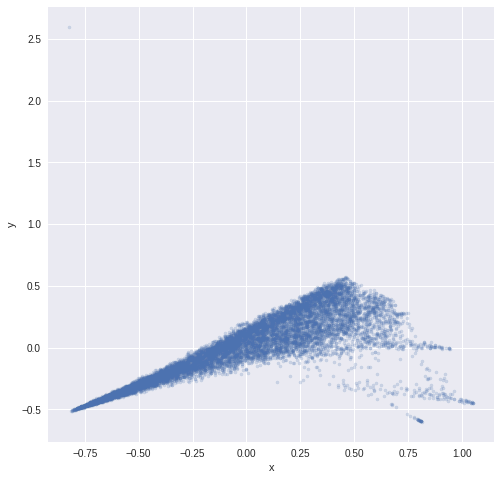

In [40]:
_ = coords_df.plot.scatter('x', 'y', figsize=(8,8), marker='o', s=10, alpha=0.2)

Doesn’t help to see it like that. Let’s try something else instead.

## BokehJS

In [41]:
output_notebook()

Loading BokehJS ...

In [0]:
subset_df = coords_df.sample(n=1000)

In [43]:
p = figure(plot_width=600, plot_height=600)
p.text(x=subset_df.x, y=subset_df.y, text=subset_df.token)

GlyphRenderer(id='1039', ...)

In [44]:
show(p)